#  비지도학습(Unsupervised Learning Techniques)
# Clustering algorithms

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
get_ipython().run_line_magic('matplotlib', 'inline')

## How often does a map change the world?
### In 1854, one produced by Doctor John Snow, altered it forever.
- In the world of the 1850s, cholera was believed to be spread by miasma in the air, germs were not yet understood and the sudden and serious outbreak of cholera in London's Soho was a mystery.
- So Snow did something data journalists often do now: he mapped the cases. **The map essentially represented each death as a bar**, and you can see them in the image below.
- It became apparent that **the cases were clustered around the pump** in Broad (now Broadwick) street.
<img src='https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2013/3/14/1363276040034/John-Snows-cholera-map-of-008.jpg?width=620&quality=45&auto=format&fit=max&dpr=2&s=c4cd9c1334c54c97c4017658d095777c'>

<img src='https://www.ph.ucla.edu/epi/snow/snowmap_1854.jpg' width=600 height=600>

<img src='https://images.squarespace-cdn.com/content/v1/50b67f21e4b0079225dcc67e/1437779980293-WVOPB1FH4YPNOR8QZELD/SnowAnalysisMaps-05.jpg' width=700 height=700>

#**Intuitive Understanding of clustering algorithm**
## **1. K-Means Clustering**
<img src='https://miro.medium.com/max/900/1*KrcZK0xYgTa4qFrVr0fO2w.gif' width=400>

<img src='https://miro.medium.com/max/1400/1*ZmktlQtiZSp6p03op3EvyA.gif' width=500>

- computing **the distances between points and group centers**

## **2. Mean-Shift Clustering**
<img src='https://miro.medium.com/max/608/1*bkFlVrrm4HACGfUzeBnErw.gif'>
<img src='https://miro.medium.com/max/810/1*vyz94J_76dsVToaa4VG1Zg.gif'>

- Mean shift clustering is a sliding-window-based algorithm that attempts **to find dense areas of data points**.
- It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window.

## **3. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**
<img src='https://miro.medium.com/max/1266/1*tc8UF-h0nQqUfLC8-0uInQ.gif'>

- DBSCAN is a density-based clustered algorithm similar to mean-shift.

## **4. Expectation–Maximization(EM) Clustering using Gaussian Mixture Models (GMM)**
<img src='https://miro.medium.com/max/675/1*OyXgise21a23D5JCss8Tlg.gif'>

- To **find the parameters of the Gaussian for each cluster** (e.g the mean and standard deviation), we will use an optimization algorithm called Expectation–Maximization (EM)

## **5. Agglomerative Hierarchical Clustering**
<img src='https://miro.medium.com/max/1313/1*ET8kCcPpr893vNZFs8j4xg.gif'>

- Hierarchical clustering algorithms fall into 2 categories: top-down or bottom-up.
- Bottom-up algorithms treat each data point as a single cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all data points.
- Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC. This hierarchy of clusters is represented as a tree (or dendrogram).


# **1. K-Means Clustering**

### 시각적 이해
<img src='https://i.imgur.com/tBkCqXJ.gif'>

1. 그룹의 개수를 k개로 정하여 임의로 centroid로 지정
2. 모든 instance를 가장 가까운 거리에 있는 그룹으로 지정
3. 두 개의 클러스터의 새로운 centroid를 생성
4. 모든 instance를 가장 가까운 거리에 있는 centroid의 그룹 재지정

blobs 데이터를 생성

In [6]:
plt.rcParams["figure.figsize"] = (12, 6)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$x_2$')

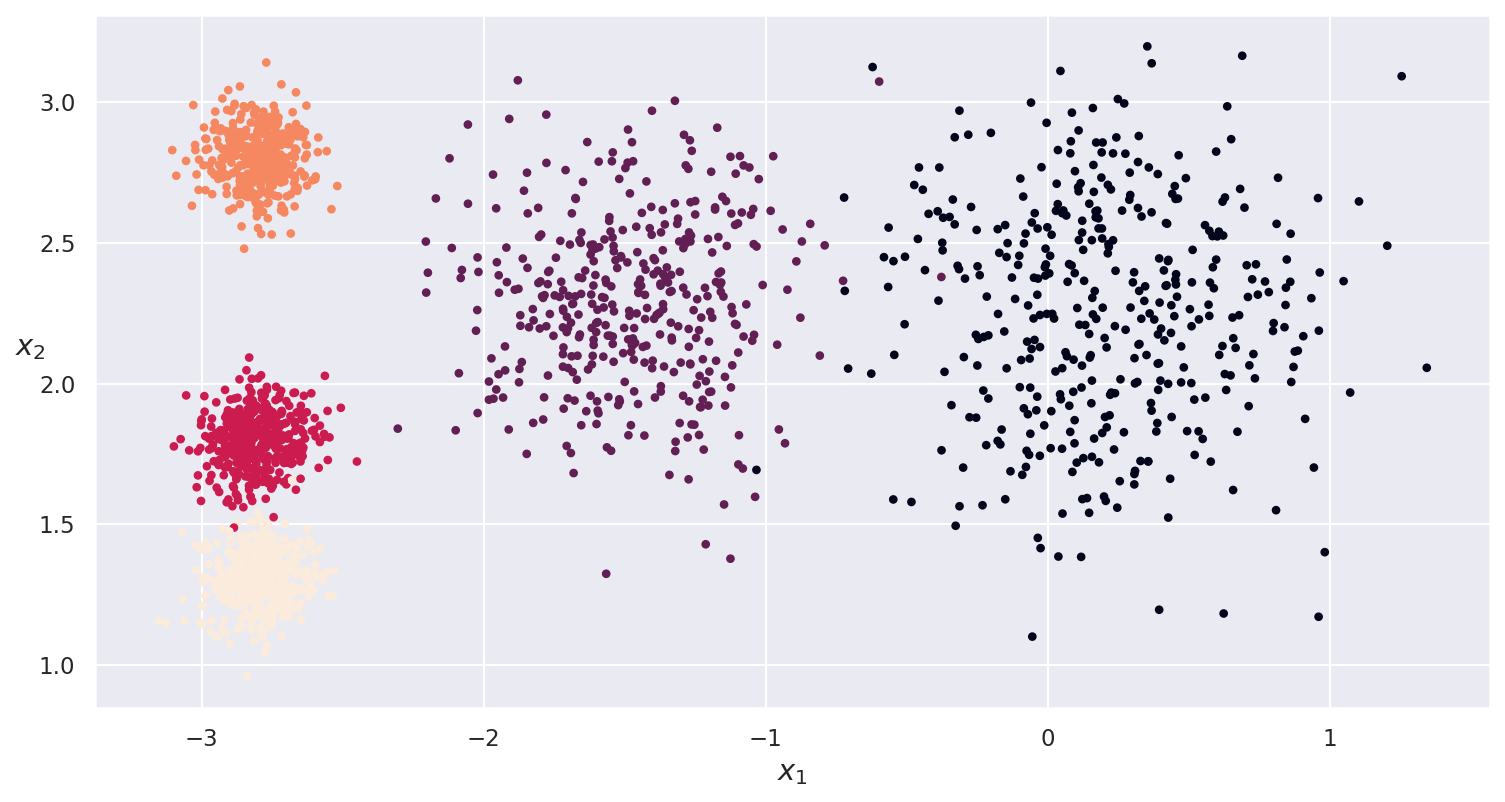

In [7]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
     [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [8]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

### **1.1 Fit and Predict**
Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

인스턴스 2,000개를 5개의 cluster로 구분

In [3]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_transform(X)

print('\n')
np.argmin(kmeans.fit_transform(X), axis=1) # 5개의 그룹과의 거리가 가장 가까운 그룹 label

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

array([4, 0, 1, ..., 2, 1, 0])

In [ ]:
kmeans.fit_predict(X) # y_pred = kmeans.fit_predict(X)
print('\n')
kmeans.labels_ # y_pred is kmeans.labels_
print('\n')
kmeans.cluster_centers_ # 5개 cluster의 centroids_ (i.e., cluster centers) 위치(좌표)

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

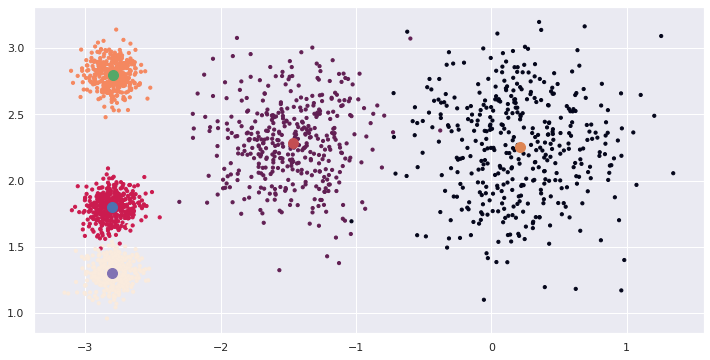

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

for i in range(5):
  plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100)

- KMeans(Class)는 훈련자료(instances)를 학습하여 레이블(Label)을 생성
- instance의 레이블(the _label_ of an instance)는 클러스터의 그룹 명

### **1.2 새로운 데이터의 소속 그룹 예측**

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new) # hard clustering
print('\n')
kmeans.transform(X_new) # soft clustering (인스턴스와 각 그룹과의 거리)

array([1, 1, 2, 2], dtype=int32)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])


- Voronoi diagram

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=30,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

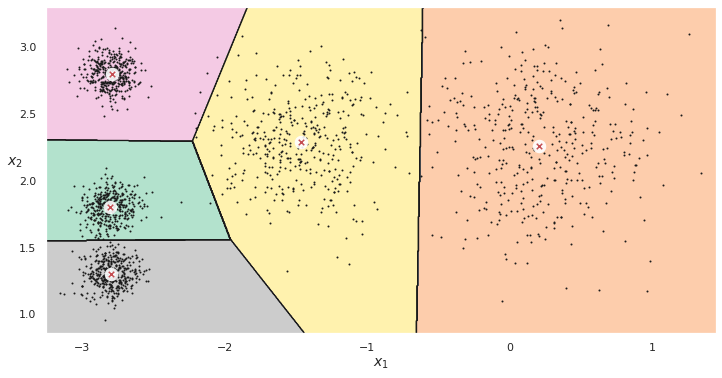

In [ ]:
plot_decision_boundaries(kmeans, X)
plt.show()

- 대부분의 인스턴스는 분류가 정확하지만 그룹사이에 위치한 인스턴스는 잘못된 그룹명(label of cluster)으로 분류
- 전체적으로 Not bad! it looks pretty good.

## **1.3. K-Means 성능 지표**
### 1.3.1 K-Means Variability
- 최초로 임의의 그룹별 무게중심(centroids)을 선정하기 때문에 클러스터링의 결과가 다르게 나타날 수있다.
- 초기 random seeds를 달리해서 k-means를 수행하면 그 결과는 변동성(variability)이 발생하게 된다.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(18, 6))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=13)

kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=29)

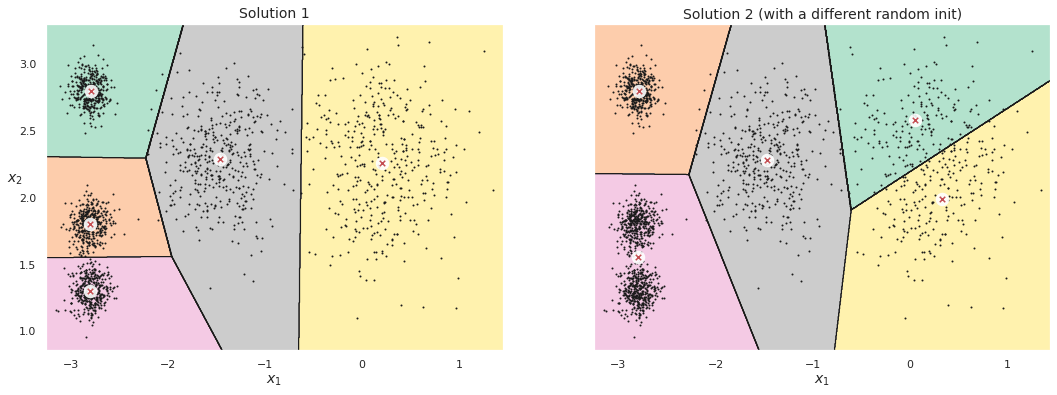

In [ ]:
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

### **1.3.2 최적의 클러스터의 개수 (Finding the optimal number of clusters)**
클러스터링 분류 성능 지표 _ **Inertia**
- The distance between each instance and its centroid,  the _inertia_ metric
    * 그룹에 속한 인스턴스와 그룹의 무게중심(centroid)과의 거리의 제곱합
       * The sum of the squared distances between each training instance and its closest centroid:
    * **inertia가 작을수록 클러스터링을 잘했다고 판단**

In [ ]:
print(f'Inertia 지표는 {kmeans.inertia_}')

Inertia 지표는 211.5985372581684


- 단순히 Inertia가 제일 작은 클러스터링의 개수를 찾으면 안된다.
     * **클러스터링 개수가 많아질수록 그에 비례하여 Inertia도 작아지게 된다.**

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

Text(0.55, 0.55, 'Elbow')

(1.0, 8.5, 0.0, 1300.0)

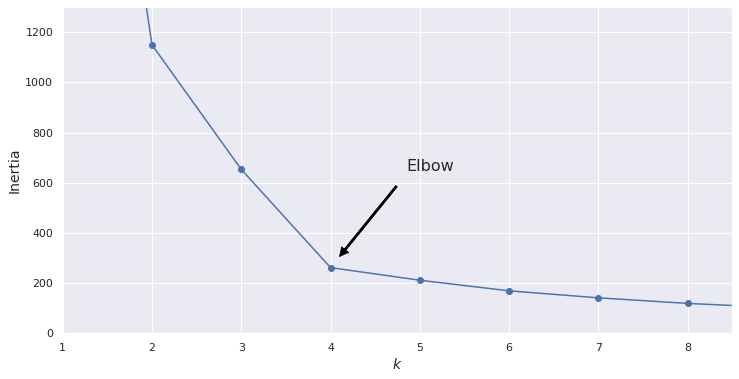

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]), xytext=(0.55, 0.55),
             textcoords='figure fraction', fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

$k=4$ 일때 가장 적합한 것으로 판단

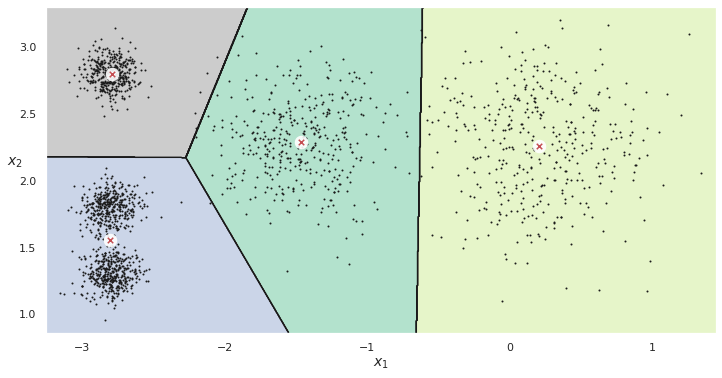

In [ ]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

### **1.3.3 Silhouette score = $(b-a)/max(a, b)$**

- $(b-a)/max(a, b) =0$ : Clusters are well apart from each other and clearly distinguished.
- $(b-a)/max(a, b) < -1$ : Clusters are assigned in the wrong way.
- $0 < (b-a)/max(a, b) < 1$ : Clusters are well apart from each other and clearly distinguished.

<img src='https://miro.medium.com/max/1400/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg'>

Let's plot the silhouette score as a function of $k$:

0.655517642572828

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Silhouette score')

(1.8, 8.5, 0.55, 0.7)

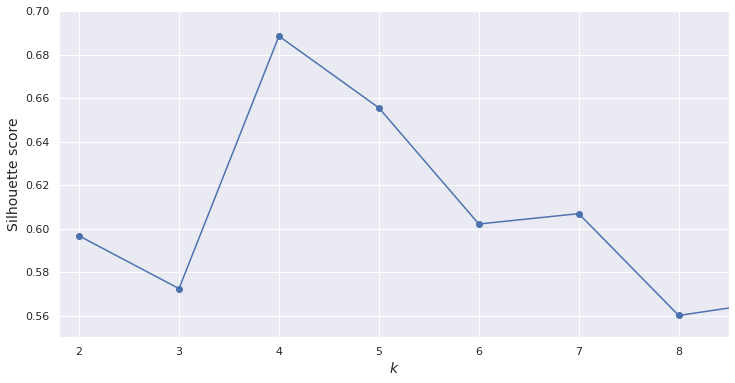

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

- Elbow 그래프보다 유용한 Silhouette score로 확인하면 $k=4$인 경우가 가장 최적의 clustering이다
- <font color='red'> $k=5$인 경우도 높은 지표를 보여주고 있는데 $k=4$를 최적의 클러스터링이라고 결정하여야 하는가?

### **1.3.4. silhouette diagram**
- 각 그룹별 인스턴스의 silhouette coefficient가 전체 silhouette coefficient 보다 **모두 골고루 높은 $k=5$ 클러스터를 선정하는 것이 최선**
   * 전체 실루엣점수(수직 점선)이 $k=4$가 $k=5$ 보다 높지만 종합적으로 판단

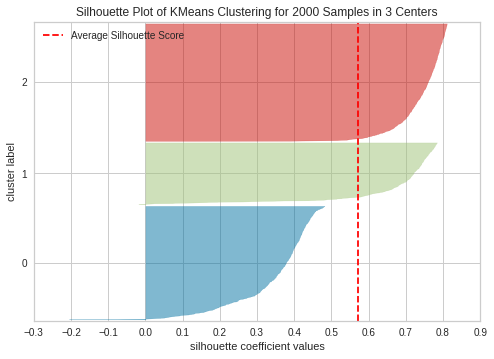

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fefb08f3290>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=16))

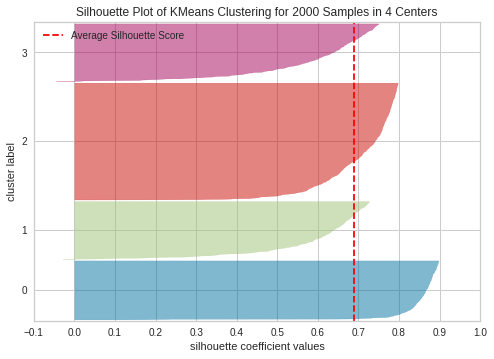

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fefaf859a90>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=16))

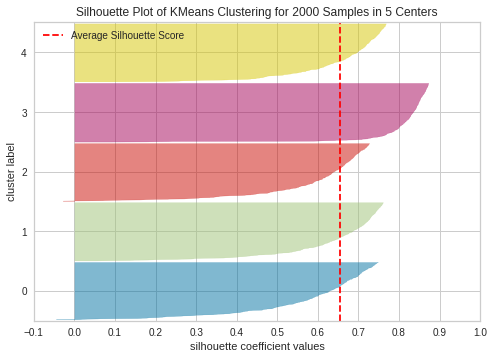

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fefaf7a9950>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=16))

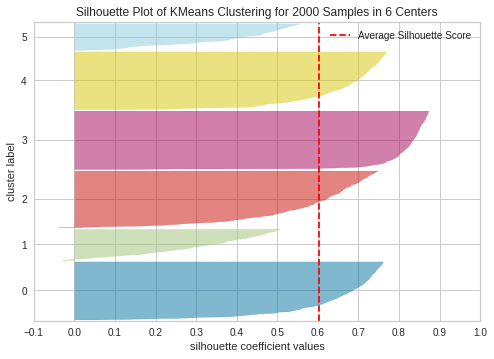

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fefaf7382d0>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=16))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
for k in [3,4,5,6]:
    silhouette_visualizer(KMeans(n_clusters=k, random_state=16), X, colors='yellowbrick')

**Selecting the number of clusters with silhouette analysis on KMeans clustering**

### **1.3.5. Outliers**
- 실루엣점수가 음수인 인스턴스는 outlisers로 판정
<img src='https://miro.medium.com/max/1400/0*QJX-OCzj8_IZayeo.png'>

Text(0.5, 1.0, 'Clusters of customers')

Text(0.5, 0, 'PC-1')

Text(0, 0.5, 'PC-2')

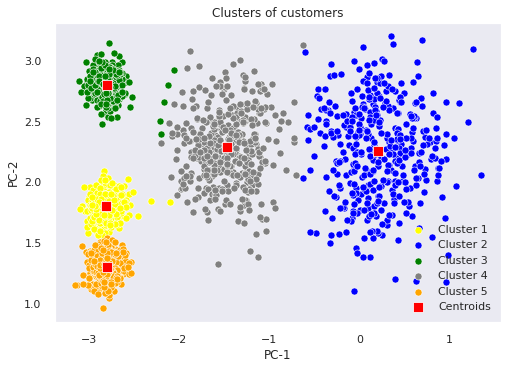

In [ ]:
# Fitting K-Means to the dataset
sns.set()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()

### **1.3.6. K-Means의 한계점 (유클리디언 거리 기준의 한계)**
- K-means 알고리즘은 몇 변의 시뮬레이션을 하여 local optimum을 오류를 줄여야 함
- 클러스터별 인스턴스의 수 혹은 **밀집도가 차이가 나는 경우** K-Means의 분류성능은 현저히 떨어진다.
- 클러스터별 인스턴스의 분포형태가 구의 형태가 아닌 경우(**non-spherical shape**)에도 K-Means의 분류성능은 현저히 떨어진다.
- k-평균의 기본 모델 가정(포인트는 다른 것보다 자체 클러스터 중심에 더 가까움)은 클러스터에 **복잡한 기하학적 구조가 있는 경우** 알고리즘이 종종 비효율적이라는 것을 의미

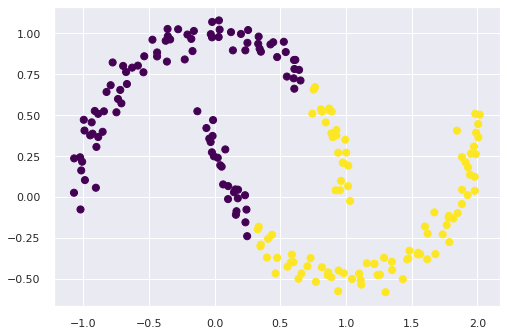

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

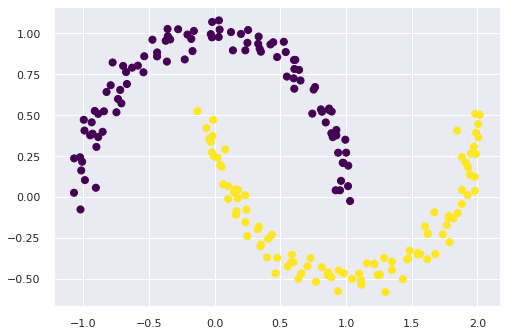

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

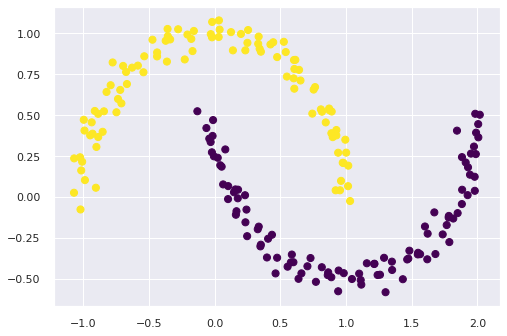

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## **2. DBSCAN(Density-based spatial clustering of applications with noise)**

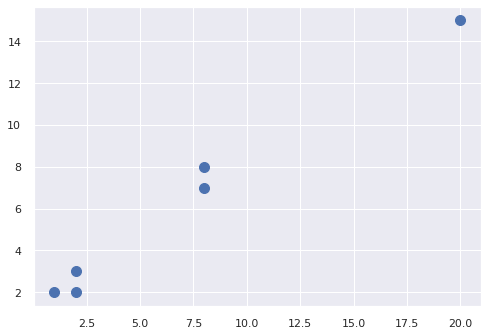

In [ ]:
from sklearn.cluster import DBSCAN

X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [20, 15]])
plt.scatter(X[:, 0], X[:, 1], s=100)

In [ ]:
DBSCAN(eps=3, min_samples=3).fit(X).labels_
print('\n')
DBSCAN(eps=3, min_samples=2).fit(X).labels_
print('\n')
DBSCAN(eps=10, min_samples=2).fit(X).labels_

array([ 0,  0,  0, -1, -1, -1])

array([ 0,  0,  0,  1,  1, -1])

array([ 0,  0,  0,  0,  0, -1])

The DBSCAN algorithm captures the dense regions as clusters and mainly requires **two parameters** for finding clusters:
- Epsilon: **The maximum distance (euclidean distance)** between a pair of points. The two points are considered as neighbors if and only if they are separated by a distance less than or equal to epsilon.
- MinPoints: **The minimum number of points **required to form a dense cluster.

- <font color='red'>빨간색 점(Core) = 핵심 점(Core instances)</font>
     * ε 반경(ε- neighborhood)안의 최소 4개 (minPts = 4)의 instance를 포함하여 4개 이상의 점이 포함되기 때문
     * 모두 서로 연결할 수 있기 때문에 단일 클러스터를 형성(빨강/노랑 단일그룹)  (Dense region)
- <font color='orange'>노란색 점 = 단일 클러스터(Border)</font>
     * 핵심 지점이 아니지만 A에서 다른 핵심 지점을 통해 도달 할 수 있으므로 단일 클러스터에도 속함
- <font color='blue'>파란색 점 = 노이즈(Noise)</font>
     * N은 핵심 지점도 아니고 직접 도달 할 수없는 노이즈 지점

<img src='https://miro.medium.com/max/1400/0*bUyZlx3rbNneiUA_'>


- 빨강, 파랑, 노랑, 초록은 Core (Clusters)
- 나머지 색깔의 점은 Border, Noise

<img src='https://miro.medium.com/max/1380/0*iIwf8kxf5YKIGhd1.gif'>

- Assign each non-core point to the nearest cluster if the cluster is its epsilon-neighbor. Otherwise, assign it to noise.
- The algorithm stops when it explores all the points one by one and classifies them as either core, border or noise point.
<img src='https://miro.medium.com/max/1400/0*uL1VInnayBMuZyHx'>

<Figure size 1296x360 with 0 Axes>

Text(0.5, 1.0, 'Original data: Two clusters')

Text(0.5, 1.0, 'DBSCAN(eps=0.05, min_samples=5)')

Text(0.5, 1.0, 'DBSCAN(eps=0.2, min_samples=5)')

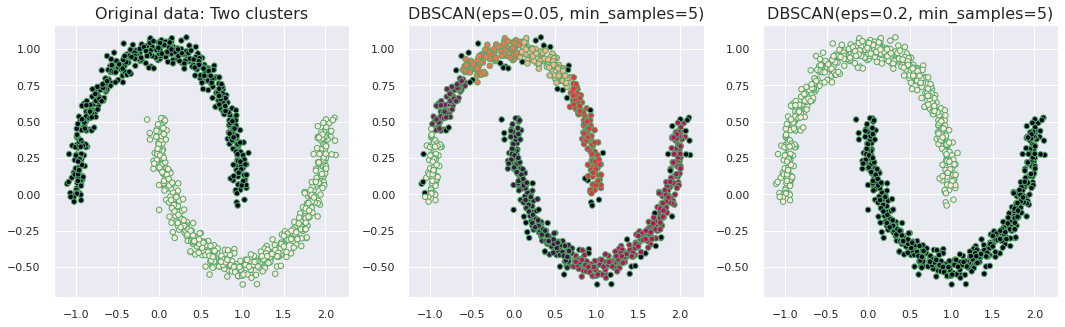

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.title('Original data: Two clusters', fontsize=16)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=30, edgecolor='g')

plt.subplot(132)
dbscan1 = DBSCAN(eps=0.05, min_samples=5)
plt.title('DBSCAN(eps=0.05, min_samples=5)', fontsize=16)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=dbscan1.fit(X).labels_, s=30, edgecolor='g')

plt.subplot(133)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
plt.title('DBSCAN(eps=0.2, min_samples=5)', fontsize=16)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=dbscan2.fit(X).labels_, s=30, edgecolor='g')

## **3. Gaussain mixture model**
- https://en.wikipedia.org/wiki/Mixture_model

### **3.1. 단변량 GM**
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Movie.gif/440px-Movie.gif' width=500>

### **Expectation–maximization algorithm**
### **2. 다변량 GM**
- https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm
<img src='https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif' width=500>

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

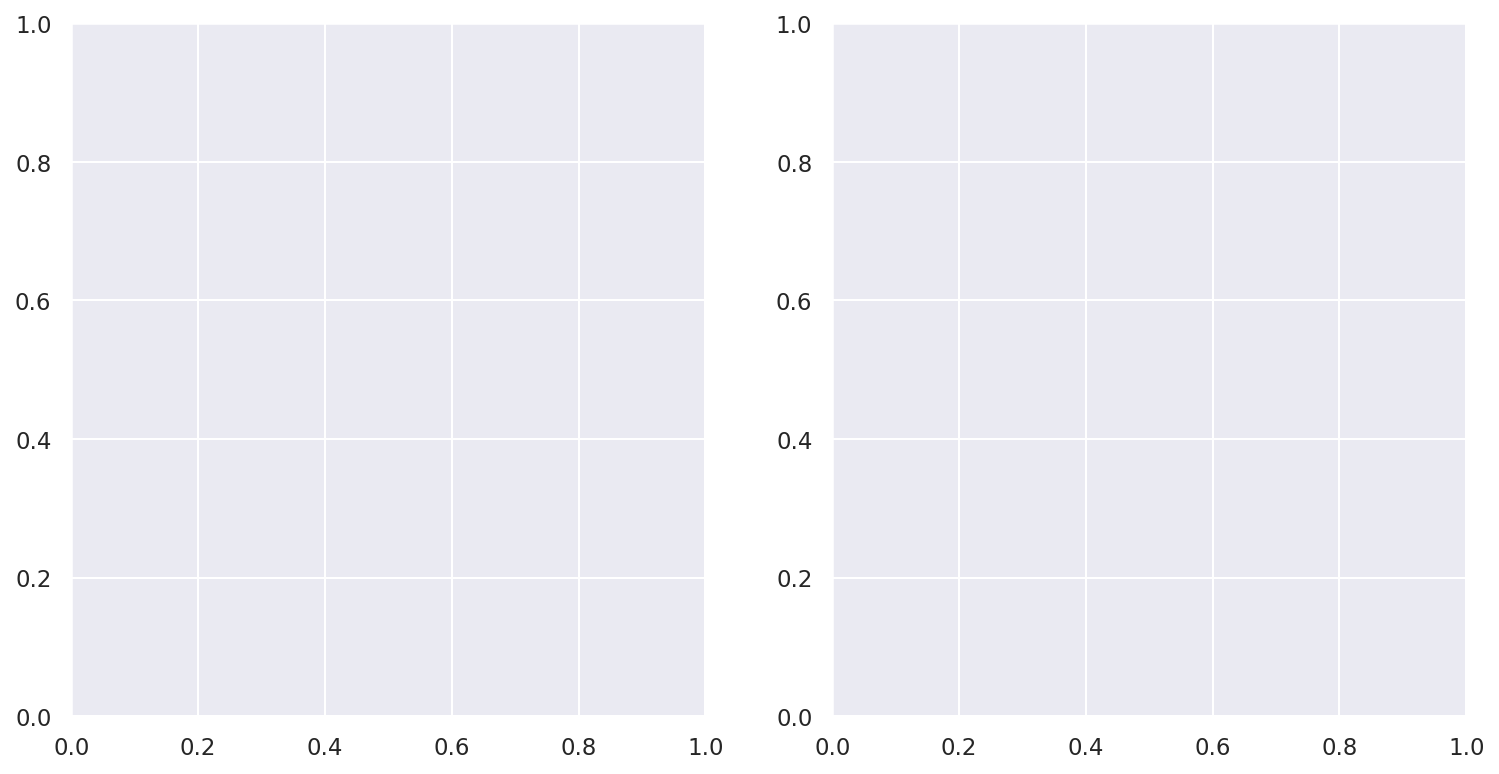

In [10]:
from sklearn.datasets import load_iris
data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
data['class'] = load_iris().target
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data['petal length (cm)'], data['petal width (cm)'],
                hue=data['class'], ax=ax[0])
sns.scatterplot(data['petal length (cm)'], data['petal width (cm)'], ax=ax[1])

- 눈으로 확인해도 금방 분류가 가능
- 사이킷런의 가우시안믹스쳐(A Gaussian mixture model) 알고리즘으로 4개의 cluster를 쉽게 분류

y_pred:mapping:, 0:1, 1:2, 2:0 으로 변환 mapp

In [9]:
from sklearn.mixture import GaussianMixture
X, y = load_iris(return_X_y=True)

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

NameError: name 'load_iris' is not defined

In [ ]:
y
print('\n')
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
mapping = np.array([2,0,1]) # 0 -> 2, 1-> 0, 2-> 1로 변환
mapping[0]
mapping[1]
mapping[2]

2

0

1

In [ ]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
print(f'정확도(accuracy)= {(y == y_pred).sum()/len(y)*100:.3f}%')

정확도(accuracy)= 96.667%


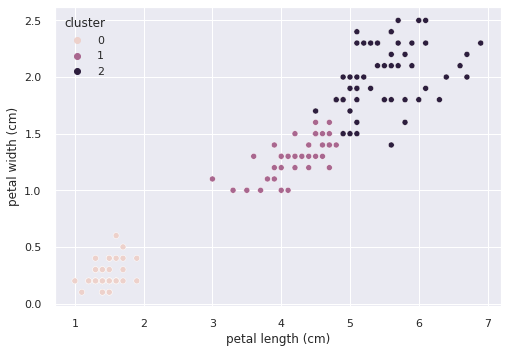

In [ ]:
data['cluster']= y_pred
sns.scatterplot(data['petal length (cm)'], data['petal width (cm)'],
                hue=data['cluster'])

# End

### **Input data**

- One important thing to note is that the algorithms implemented in this module can take different kinds of matrix as input.
- All the methods accept standard data matrices of shape (n_samples, n_features). These can be obtained from the classes in the sklearn.feature_extraction module.
- For AffinityPropagation, SpectralClustering and DBSCAN one can also input similarity matrices of shape (n_samples, n_samples). These can be obtained from the functions in the sklearn.metrics.pairwise module.

## **KMeans (with matrices (n_samples, n_features))**


3개의 그룹의 중심점은 
 [[ 5.          6.66666667]
 [ 1.          0.5       ]
 [-0.5         5.5       ]]


array([2, 2, 1, 1, 0, 0, 0], dtype=int32)

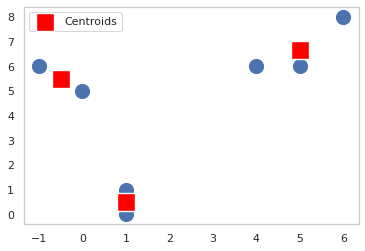

In [ ]:
from sklearn.cluster import KMeans
X = np.array([[-1, 6], [0, 5],        # toy group 1
              [1, 0], [1, 1],         # toy group 2
              [4, 6], [5, 6], [6, 8]])# toy group 3
plt.scatter(X[:, 0], X[:, 1], s=200)

n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print(f'\n{n_clusters}개의 그룹의 중심점은 \n {kmeans.cluster_centers_}')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300, marker=',')
y_kmeans

##**SpectralClustering (with sklearn.metrics.pairwise)**

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)

cm = sns.light_palette("blue", as_cmap=True)
pd.DataFrame(D).style.background_gradient(cmap=cm).set_precision(2)

sns.set_style("whitegrid", {'axes.grid' : False})
#plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
#plt.colorbar()

,0,1,2,3,4,5,6
0,0.00,1.41,6.32,5.39,5.00,6.00,7.28
1,1.41,0.00,5.10,4.12,4.12,5.10,6.71
2,6.32,5.10,0.00,1.00,6.71,7.21,9.43
3,5.39,4.12,1.00,0.00,5.83,6.40,8.60
4,5.00,4.12,6.71,5.83,0.00,1.00,2.83
5,6.00,5.10,7.21,6.40,1.00,0.00,2.24
6,7.28,6.71,9.43,8.60,2.83,2.24,0.00


In [ ]:
from sklearn.metrics import pairwise
D = pairwise.rbf_kernel(X)

cm = sns.light_palette("blue", as_cmap=True)
pd.DataFrame(D).style.background_gradient(cmap=cm).set_precision(2)

sns.set_style("whitegrid", {'axes.grid' : False})
#plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
#plt.colorbar()

,0,1,2,3,4,5,6
0,1.00,0.37,0.00,0.00,0.00,0.00,0.00
1,0.37,1.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.61,0.00,0.00,0.00
3,0.00,0.00,0.61,1.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.61,0.02
5,0.00,0.00,0.00,0.00,0.61,1.00,0.08
6,0.00,0.00,0.00,0.00,0.02,0.08,1.00


array([1, 1, 1, 0, 0, 0], dtype=int32)

array([1, 0], dtype=int32)

array([[10.,  2.],
       [ 1.,  2.]])

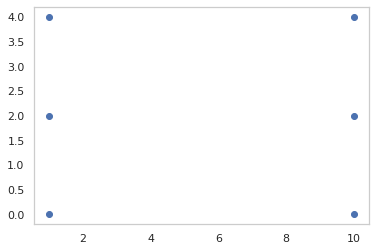

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
plt.scatter(X[:, 0], X[:, 1])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
print('\n')
kmeans.predict([[0, 0], [12, 3]])
print('\n')
kmeans.cluster_centers_

,0,1,2,3,4,5
0,0.00,2.00,2.00,9.00,9.22,9.22
1,2.00,0.00,4.00,9.22,9.00,9.85
2,2.00,4.00,0.00,9.22,9.85,9.00
3,9.00,9.22,9.22,0.00,2.00,2.00
4,9.22,9.00,9.85,2.00,0.00,4.00
5,9.22,9.85,9.00,2.00,4.00,0.00


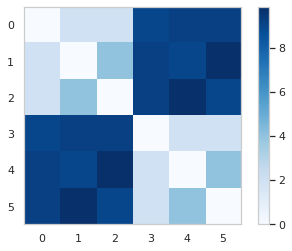

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
cm = sns.light_palette("blue", as_cmap=True)
pd.DataFrame(D).style.background_gradient(cmap=cm).set_precision(2)

sns.set_style("whitegrid", {'axes.grid' : False})

plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [ ]:
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

model = SpectralCoclustering(n_clusters=2, random_state=0)
model.fit(D)

SpectralCoclustering(n_clusters=2, random_state=0)

In [ ]:
model.biclusters_
print('\n')
model.row_labels_
print('\n')
model.column_labels_

(array([[False, False, False,  True,  True,  True],
        [ True,  True,  True, False, False, False]]),
 array([[ True,  True,  True, False, False, False],
        [False, False, False,  True,  True,  True]]))

array([1, 1, 1, 0, 0, 0], dtype=int32)

array([0, 0, 0, 1, 1, 1], dtype=int32)

Text(0.5, 1.05, 'After biclustering; rearranged to show biclusters')

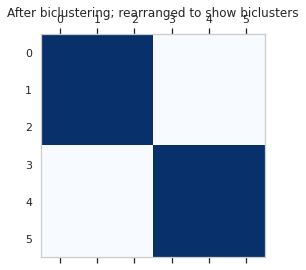

In [ ]:
r = np.array(model.row_labels_.tolist()*3).reshape(3,6)
c = np.array(model.column_labels_.tolist()*3).reshape(3,6)
fit_data = np.vstack((r,c))
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

# **SpectralCoclustering**

(300, 300)

Text(0.5, 1.05, 'Original dataset')

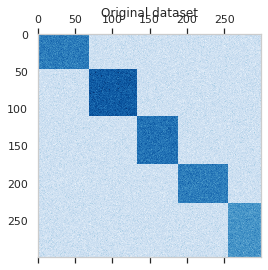

In [ ]:
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)
data.shape
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

Text(0.5, 1.05, 'Shuffled dataset')

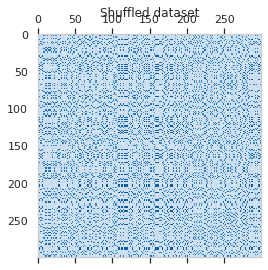

In [ ]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [ ]:
data
rows
columns

array([[ -1.25896876,   6.34016178,   2.22183357, ...,  -0.41046925,
          4.46062441,  56.6711734 ],
       [ -6.81960615,  -1.80773574,   4.88850208, ...,   8.01492546,
         -4.26109596,  59.87796626],
       [  4.26023713,   1.78837538,  -7.26516899, ...,  64.59973473,
        -11.75217096,  -3.42496729],
       ...,
       [ 65.13198291,   3.35713673,  -1.67840943, ...,   6.49127497,
          1.51497015,  -3.57444741],
       [  1.27486976,   2.191147  ,   4.54612521, ...,  53.98901784,
         -0.5652718 ,  -0.91444789],
       [ 58.49701506,  -0.9331078 ,  -2.1735434 , ...,   4.94859535,
         -0.973844  ,   4.36361103]])

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True]])

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True]])

In [ ]:
rows[:, row_idx]

array([[False, False,  True, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True],
       [ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

SpectralCoclustering(n_clusters=5, random_state=0)

consensus score: 1.000


Text(0.5, 1.05, 'After biclustering; rearranged to show biclusters')

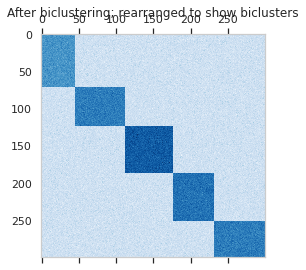

In [ ]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()